# Tasic B. et al. 2018 Mouse neocortical areas

## Reference:    
[Tasic B. et al. Shared and distinct transcriptomic cell types across neocortical areas. Naturevolume 563, pages72–78 (2018)](https://www.nature.com/articles/s41586-018-0654-5#Abs1)

## GEO:    
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE115746

# Top

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")

from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


# Download

In [2]:
phn1 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_accession_table.csv.gz",\
                index_col=0, sep='\t')
phn2 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_complete_metadata_28706-cells.csv.gz",\
                index_col=0)

> According to the paper, only consider exons.

In [ ]:
cts1 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_cells_exon_counts.csv.gz",\
                index_col=0)
cts2 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_controls_exon_counts.csv.gz",\
                index_col=0)

In [ ]:
cts = pd.concat([cts1,cts2],axis=1)

In [ ]:
cts.shape

In [ ]:
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.T.values))
ad.obs_names = cts.columns
ad.var_names = cts.index

ad = ad[ad.obs_names.isin(phn2.index),:]
phn = phn2.loc[ad.obs_names]
ad.obs['x'] =''
ad.obs = phn

In [ ]:
ad

In [5]:
ad.raw = sc.pp.log1p(ad, copy=True)

In [ ]:
ad.obs['cell'] = ad.obs['cell_subclass']

In [6]:
ad.write("../write/Tasic2018Cortex.h5")

In [ ]:
cts1 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_cells_intron_counts.csv.gz",\
                index_col=0)
cts2 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_controls_intron_counts.csv.gz",\
                index_col=0)
cts = pd.concat([cts1,cts2],axis=1)

In [ ]:
cts.shape

In [ ]:
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.T.values))
ad.obs_names = cts.columns
ad.var_names = cts.index

In [ ]:
ad.write("../write/Tasic2018Cortex_intron.h5")

# Analysis

In [2]:
ad = sc.read("../write/Tasic2018Cortex.h5")

In [3]:
ad = ad[ad.obs['sequencing_qc_pass_fail']=='Pass',:]
ad = ad[~ad.obs['cell_class'].isin(['Low Quality','No Class'])]
ad = ad[~ad.obs['cell_class'].isin(['ERCC','ControlTotalRNA','MouseWholeRNA'])]
ad = ad[~ad.obs['cell_subclass'].isin(['nan'])]

In [4]:
sc.pp.filter_cells(ad, min_genes=200)
sc.pp.filter_cells(ad, min_counts=200)
sc.pp.filter_genes(ad, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


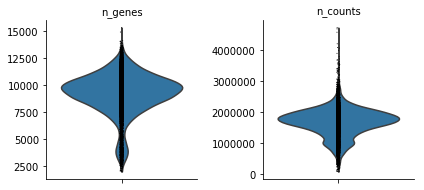

In [5]:
sc.pl.violin(ad, ['n_genes', 'n_counts'],
             jitter=0.01, multi_panel=True, cut=0)

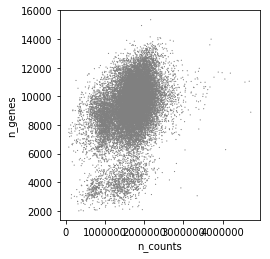

In [6]:
figsize(4,4)
sc.pl.scatter(ad, x='n_counts', y='n_genes')

In [7]:
sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e4)
sc.pp.log1p(ad)

In [8]:
# sc.pp.highly_variable_genes(ad, min_mean=0.0125, max_mean=10, min_disp=0.5)
# sc.pl.highly_variable_genes(ad)

In [9]:
sc.tl.pca(ad, svd_solver='arpack')
sc.pp.neighbors(ad)
sc.tl.umap(ad)

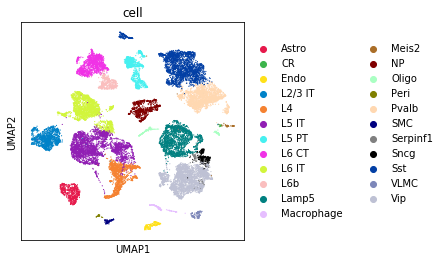

In [20]:
sc.pl.umap(ad, color=['cell'])

In [11]:
# ad.write('../write/Tasic2018Cortex_reg.h5')

In [12]:
# ad = sc.read('../write/Tasic2018Cortex_reg.h5')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [13]:
sc.tl.tsne(ad)

In [14]:
ad.uns['cell_colors'] = color_long

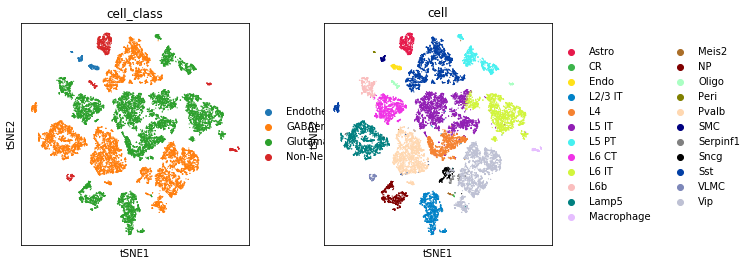

In [15]:
sc.pl.tsne(ad, color=['cell_class','cell'])

In [16]:
ad.write('../write/Tasic2018Cortex_reg.h5')

In [18]:
ad.obs['donor_id'].value_counts()

254569    348
245824    325
254570    280
237585    261
227236    243
         ... 
356471      1
287328      1
313296      1
246121      1
270079      1
Name: donor_id, Length: 342, dtype: int64

In [21]:
sc.pp.neighbors(ad)

sc.tl.louvain(ad, resolution=1.5, key_added='louvain_r1.5')
sc.tl.louvain(ad, resolution=2.5, key_added='louvain_r2.5')
sc.tl.louvain(ad, resolution=2, key_added='louvain_r2')
sc.tl.louvain(ad, resolution=3, key_added='louvain_r3')
sc.tl.louvain(ad, resolution=0.3, key_added='louvain_r0.3')

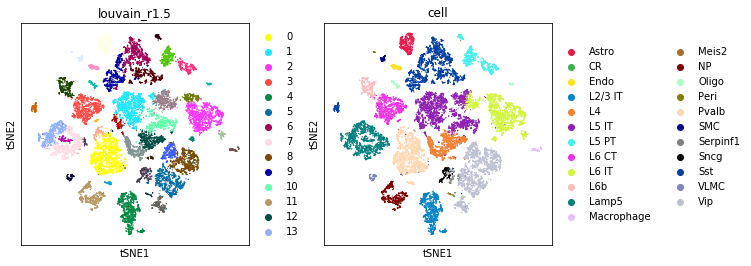

In [23]:
sc.pl.tsne(ad, color=['louvain_r1.5','cell'])

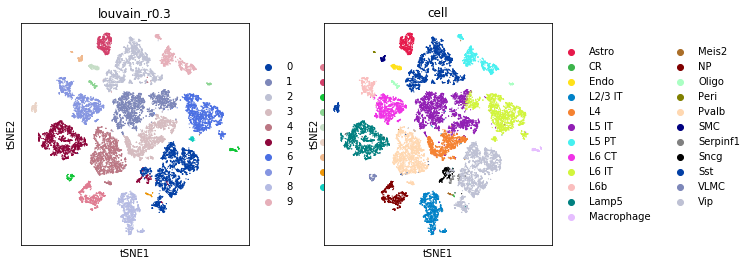

In [24]:
sc.pl.tsne(ad, color=['louvain_r0.3','cell'])

R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9678
Accuracy on the training set: 0.9830
Accuracy on the hold-out set: 0.9481


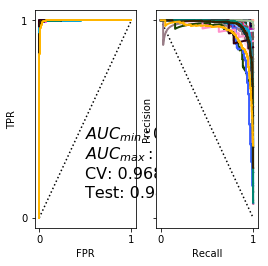

Accuracy on the training set: 0.9773
Accuracy on the hold-out set: 0.9503
Accuracy on the training set: 0.9810
Accuracy on the hold-out set: 0.9501
Max R1mat: 0.558621
Max R2mat: 0.004496
min_acc: 0.948138


<Figure size 288x288 with 0 Axes>

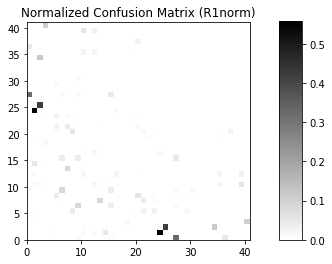

<Figure size 288x288 with 0 Axes>

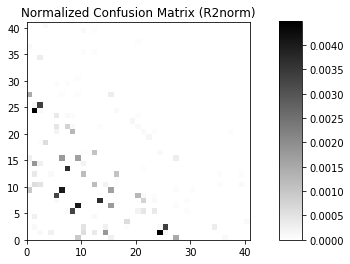

IGRAPH U-W- 41 2 --
+ attr: weight (e)
+ edges:
1--24 1--24


... storing 'L1_Round0_self-projection' as categorical
... storing 'L1_Round1' as categorical


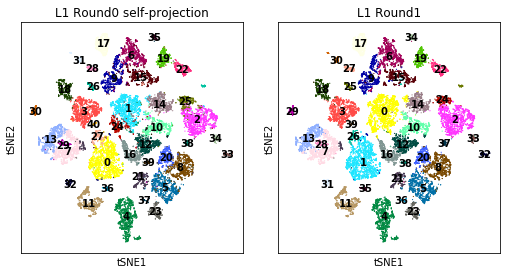

Round2 ...
Mean CV accuracy: 0.9639
Accuracy on the training set: 0.9819
Accuracy on the hold-out set: 0.9546


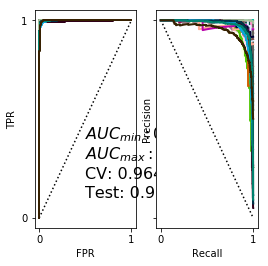

Accuracy on the training set: 0.9787
Accuracy on the hold-out set: 0.9578
Accuracy on the training set: 0.9799
Accuracy on the hold-out set: 0.9532
Max R1mat: 0.404255
Max R2mat: 0.004796
min_acc: 0.953231


<Figure size 288x288 with 0 Axes>

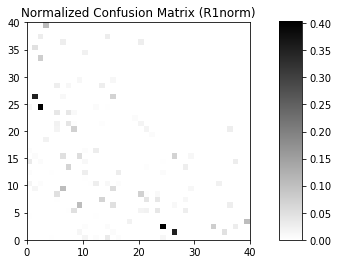

<Figure size 288x288 with 0 Axes>

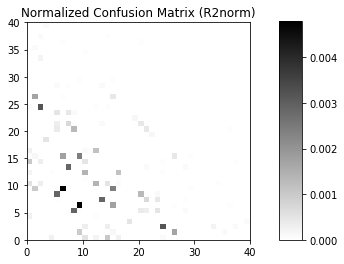

IGRAPH U-W- 40 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.404255
m2: 0.004796
Accuracy: 0.953231
start_iter: 1
R1norm_cutoff: 0.394255
R2norm_cutoff: 0.003796
Accuracy: 0.953231
Round2 ...
Mean CV accuracy: 0.9627
Accuracy on the training set: 0.9796
Accuracy on the hold-out set: 0.9531


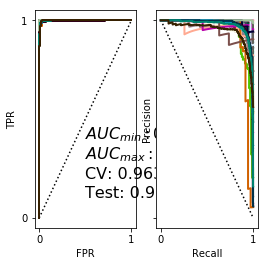

Accuracy on the training set: 0.9817
Accuracy on the hold-out set: 0.9528
Accuracy on the training set: 0.9793
Accuracy on the hold-out set: 0.9556
Max R1mat: 0.402439
Max R2mat: 0.003875
min_acc: 0.952798


<Figure size 288x288 with 0 Axes>

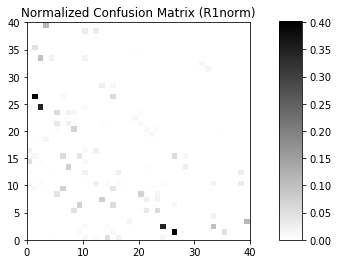

<Figure size 288x288 with 0 Axes>

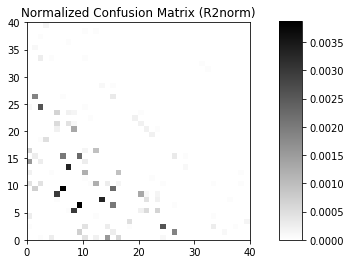

IGRAPH U-W- 40 2 --
+ attr: weight (e)
+ edges:
1--26 1--26


... storing 'L1_Round1_self-projection' as categorical
... storing 'L1_Round2' as categorical


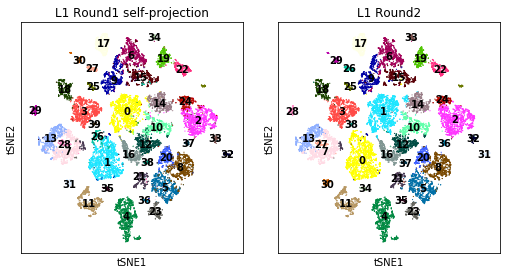

Round3 ...
Mean CV accuracy: 0.9575
Accuracy on the training set: 0.9784
Accuracy on the hold-out set: 0.9564


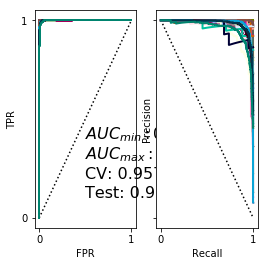

Accuracy on the training set: 0.9793
Accuracy on the hold-out set: 0.9547
Accuracy on the training set: 0.9796
Accuracy on the hold-out set: 0.9544
Max R1mat: 0.577465
Max R2mat: 0.004503
min_acc: 0.954372


<Figure size 288x288 with 0 Axes>

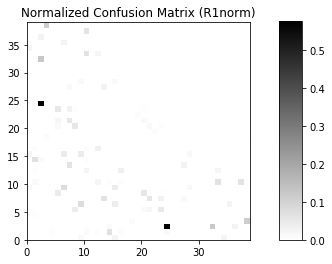

<Figure size 288x288 with 0 Axes>

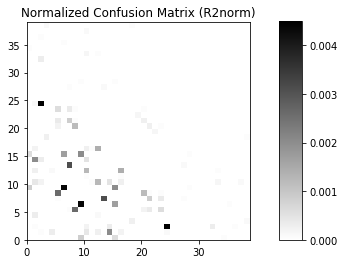

IGRAPH U-W- 39 2 --
+ attr: weight (e)
+ edges:
2--24 2--24


... storing 'L1_Round2_self-projection' as categorical
... storing 'L1_Round3' as categorical


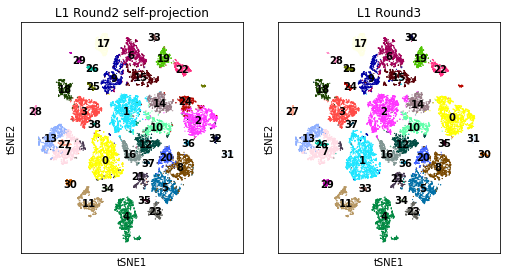

Round4 ...
Mean CV accuracy: 0.9652
Accuracy on the training set: 0.9831
Accuracy on the hold-out set: 0.9626


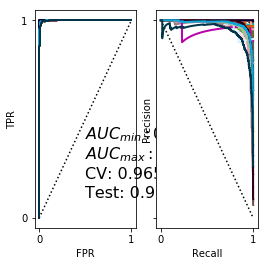

Accuracy on the training set: 0.9840
Accuracy on the hold-out set: 0.9621
Accuracy on the training set: 0.9818
Accuracy on the hold-out set: 0.9622
Max R1mat: 0.111111
Max R2mat: 0.003918
min_acc: 0.962109


<Figure size 288x288 with 0 Axes>

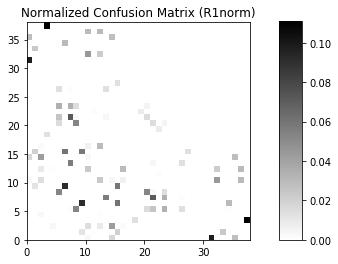

<Figure size 288x288 with 0 Axes>

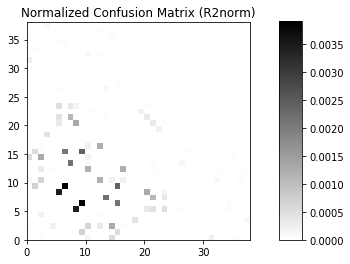

IGRAPH U-W- 38 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.111111
m2: 0.003918
Accuracy: 0.962109
start_iter: 3
R1norm_cutoff: 0.101111
R2norm_cutoff: 0.002918
Accuracy: 0.962109
Round4 ...
Mean CV accuracy: 0.9639
Accuracy on the training set: 0.9821
Accuracy on the hold-out set: 0.9595


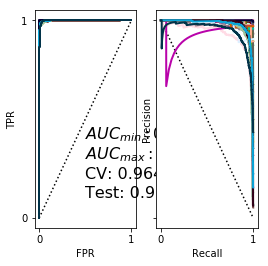

Accuracy on the training set: 0.9809
Accuracy on the hold-out set: 0.9604
Accuracy on the training set: 0.9862
Accuracy on the hold-out set: 0.9594
Max R1mat: 0.120000
Max R2mat: 0.004050
min_acc: 0.959433


<Figure size 288x288 with 0 Axes>

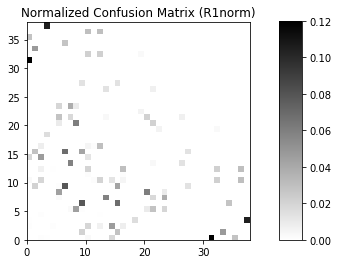

<Figure size 288x288 with 0 Axes>

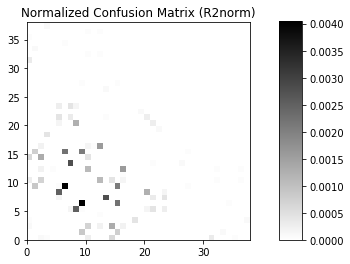

IGRAPH U-W- 38 4 --
+ attr: weight (e)
+ edges:
0--31 3--37 0--31 3--37


... storing 'L1_Round3_self-projection' as categorical
... storing 'L1_Round4' as categorical


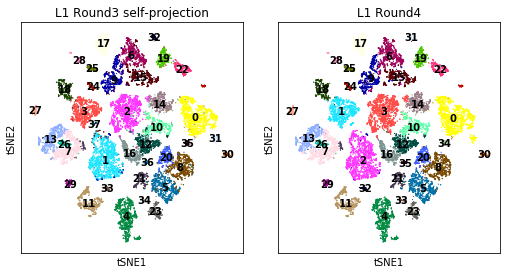

Round5 ...
Mean CV accuracy: 0.9631
Accuracy on the training set: 0.9804
Accuracy on the hold-out set: 0.9602


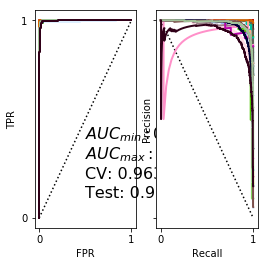

Accuracy on the training set: 0.9782
Accuracy on the hold-out set: 0.9626
Accuracy on the training set: 0.9862
Accuracy on the hold-out set: 0.9612
Max R1mat: 0.090909
Max R2mat: 0.004244
min_acc: 0.960226


<Figure size 288x288 with 0 Axes>

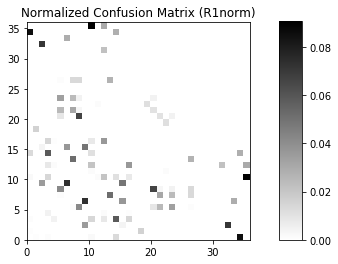

<Figure size 288x288 with 0 Axes>

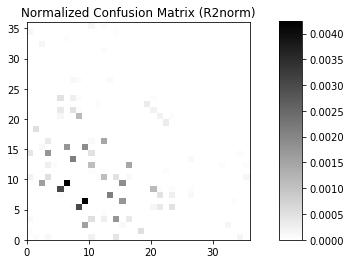

IGRAPH U-W- 36 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.090909
m2: 0.004244
Accuracy: 0.960226
start_iter: 4
R1norm_cutoff: 0.080909
R2norm_cutoff: 0.003244
Accuracy: 0.960226
Round5 ...
Mean CV accuracy: 0.9660
Accuracy on the training set: 0.9849
Accuracy on the hold-out set: 0.9624


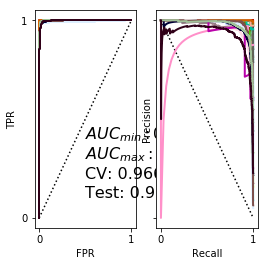

Accuracy on the training set: 0.9897
Accuracy on the hold-out set: 0.9591
Accuracy on the training set: 0.9824
Accuracy on the hold-out set: 0.9594
Max R1mat: 0.086743
Max R2mat: 0.003582
min_acc: 0.959053


<Figure size 288x288 with 0 Axes>

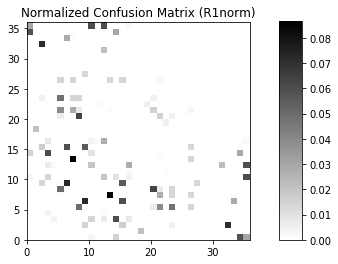

<Figure size 288x288 with 0 Axes>

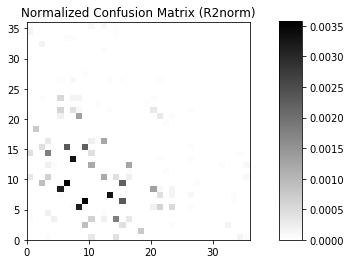

IGRAPH U-W- 36 2 --
+ attr: weight (e)
+ edges:
7--13 7--13


... storing 'L1_Round4_self-projection' as categorical
... storing 'L1_Round5' as categorical


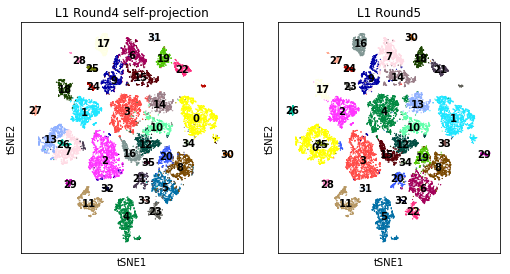

Round6 ...
Mean CV accuracy: 0.9669
Accuracy on the training set: 0.9834
Accuracy on the hold-out set: 0.9640


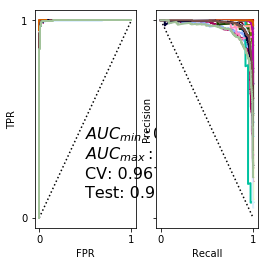

Accuracy on the training set: 0.9877
Accuracy on the hold-out set: 0.9618
Accuracy on the training set: 0.9834
Accuracy on the hold-out set: 0.9639
Max R1mat: 0.090909
Max R2mat: 0.004206
min_acc: 0.961763


<Figure size 288x288 with 0 Axes>

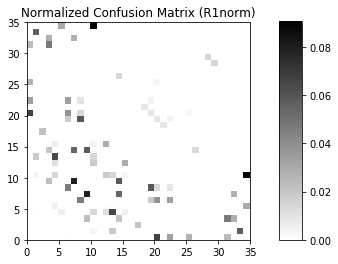

<Figure size 288x288 with 0 Axes>

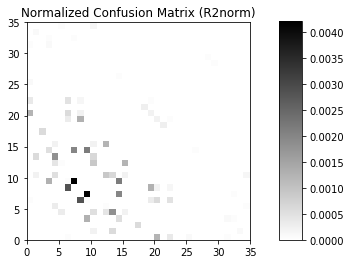

IGRAPH U-W- 35 2 --
+ attr: weight (e)
+ edges:
10--34 10--34


... storing 'L1_Round5_self-projection' as categorical
... storing 'L1_Round6' as categorical


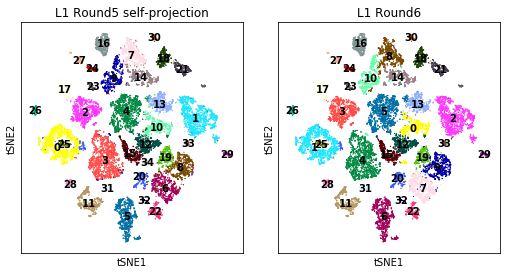

Round7 ...
Mean CV accuracy: 0.9709
Accuracy on the training set: 0.9866
Accuracy on the hold-out set: 0.9616


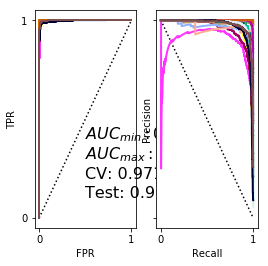

Accuracy on the training set: 0.9873
Accuracy on the hold-out set: 0.9632
Accuracy on the training set: 0.9806
Accuracy on the hold-out set: 0.9657
Max R1mat: 0.098101
Max R2mat: 0.004628
min_acc: 0.961565


<Figure size 288x288 with 0 Axes>

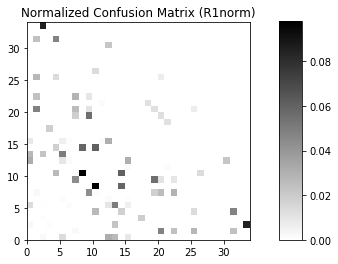

<Figure size 288x288 with 0 Axes>

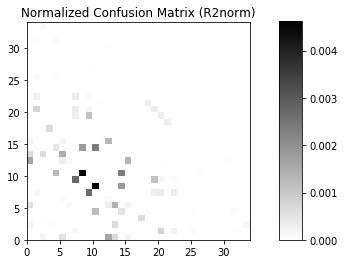

IGRAPH U-W- 34 2 --
+ attr: weight (e)
+ edges:
8--10 8--10


... storing 'L1_Round6_self-projection' as categorical
... storing 'L1_Round7' as categorical


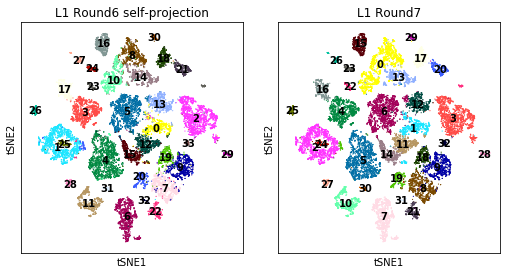

Round8 ...
Mean CV accuracy: 0.9744
Accuracy on the training set: 0.9868
Accuracy on the hold-out set: 0.9669


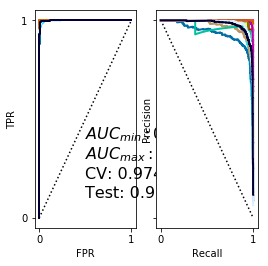

Accuracy on the training set: 0.9820
Accuracy on the hold-out set: 0.9661
Accuracy on the training set: 0.9875
Accuracy on the hold-out set: 0.9663
Max R1mat: 0.169697
Max R2mat: 0.005786
min_acc: 0.966086


<Figure size 288x288 with 0 Axes>

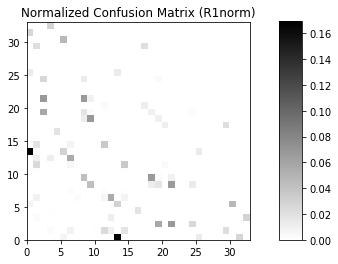

<Figure size 288x288 with 0 Axes>

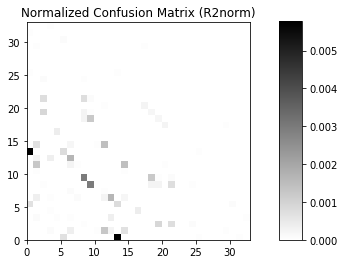

IGRAPH U-W- 33 2 --
+ attr: weight (e)
+ edges:
0--13 0--13


... storing 'L1_Round7_self-projection' as categorical
... storing 'L1_Round8' as categorical


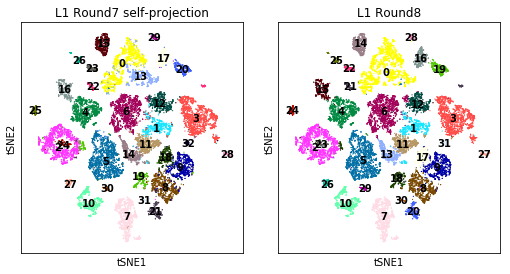

Round9 ...
Mean CV accuracy: 0.9749
Accuracy on the training set: 0.9882
Accuracy on the hold-out set: 0.9745


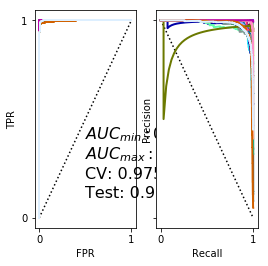

Accuracy on the training set: 0.9878
Accuracy on the hold-out set: 0.9744
Accuracy on the training set: 0.9914
Accuracy on the hold-out set: 0.9716
Max R1mat: 0.071429
Max R2mat: 0.003301
min_acc: 0.971607


<Figure size 288x288 with 0 Axes>

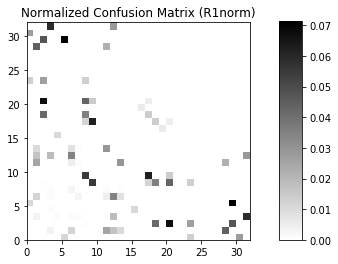

<Figure size 288x288 with 0 Axes>

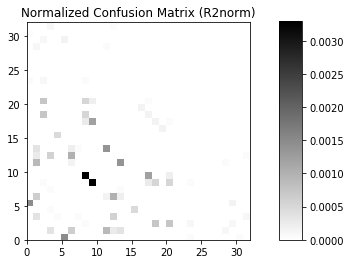

IGRAPH U-W- 32 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.071429
m2: 0.003301
Accuracy: 0.971607
start_iter: 8
R1norm_cutoff: 0.061429
R2norm_cutoff: 0.002301
Accuracy: 0.971607
Round9 ...
Mean CV accuracy: 0.9727
Accuracy on the training set: 0.9878
Accuracy on the hold-out set: 0.9729


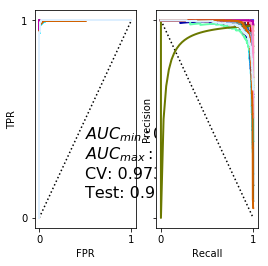

Accuracy on the training set: 0.9885
Accuracy on the hold-out set: 0.9734
Accuracy on the training set: 0.9867
Accuracy on the hold-out set: 0.9744
Max R1mat: 0.088050
Max R2mat: 0.003239
min_acc: 0.972864


<Figure size 288x288 with 0 Axes>

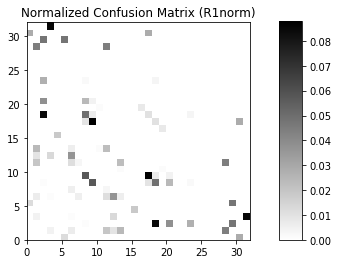

<Figure size 288x288 with 0 Axes>

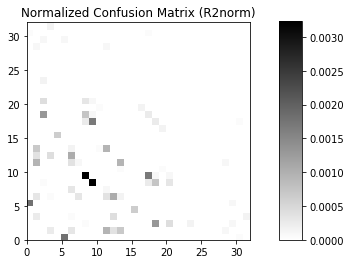

IGRAPH U-W- 32 4 --
+ attr: weight (e)
+ edges:
2--18 9--17 9--17 2--18


... storing 'L1_Round8_self-projection' as categorical
... storing 'L1_Round9' as categorical


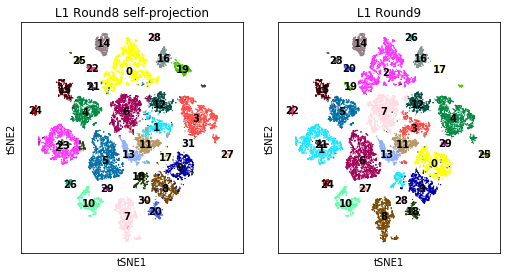

Round10 ...
Mean CV accuracy: 0.9779
Accuracy on the training set: 0.9934
Accuracy on the hold-out set: 0.9755


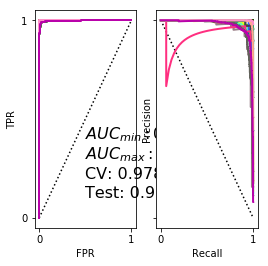

Accuracy on the training set: 0.9899
Accuracy on the hold-out set: 0.9749
Accuracy on the training set: 0.9911
Accuracy on the hold-out set: 0.9739
Max R1mat: 0.088889
Max R2mat: 0.003955
min_acc: 0.973923


<Figure size 288x288 with 0 Axes>

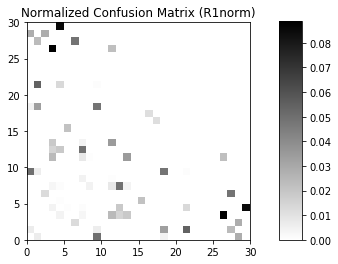

<Figure size 288x288 with 0 Axes>

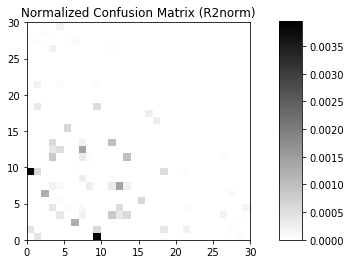

IGRAPH U-W- 30 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.088889
m2: 0.003955
Accuracy: 0.973923
start_iter: 9
R1norm_cutoff: 0.078889
R2norm_cutoff: 0.002955
Accuracy: 0.973923
Round10 ...
Mean CV accuracy: 0.9745
Accuracy on the training set: 0.9903
Accuracy on the hold-out set: 0.9748


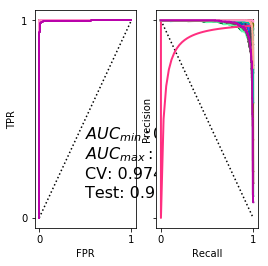

Accuracy on the training set: 0.9923
Accuracy on the hold-out set: 0.9742
Accuracy on the training set: 0.9888
Accuracy on the hold-out set: 0.9759
Max R1mat: 0.066667
Max R2mat: 0.004302
min_acc: 0.974234


<Figure size 288x288 with 0 Axes>

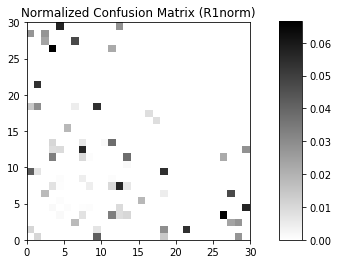

<Figure size 288x288 with 0 Axes>

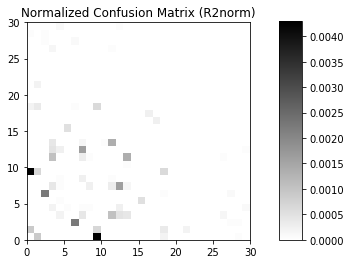

IGRAPH U-W- 30 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.066667
m2: 0.004302
Accuracy: 0.974234
start_iter: 9
R1norm_cutoff: 0.056667
R2norm_cutoff: 0.003302
Accuracy: 0.974234
Round10 ...
Mean CV accuracy: 0.9818
Accuracy on the training set: 0.9919
Accuracy on the hold-out set: 0.9743


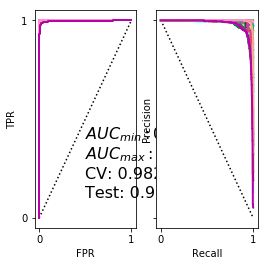

Accuracy on the training set: 0.9923
Accuracy on the hold-out set: 0.9738
Accuracy on the training set: 0.9884
Accuracy on the hold-out set: 0.9754
Max R1mat: 0.081081
Max R2mat: 0.004051
min_acc: 0.973767


<Figure size 288x288 with 0 Axes>

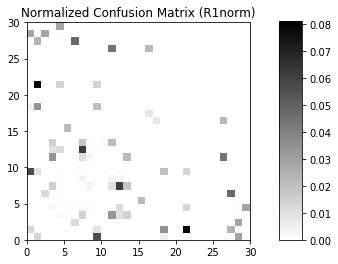

<Figure size 288x288 with 0 Axes>

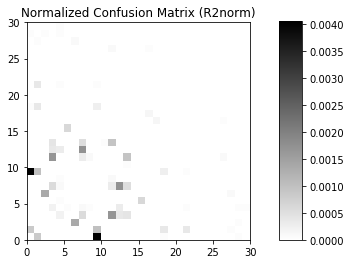

IGRAPH U-W- 30 4 --
+ attr: weight (e)
+ edges:
1--21 7--12 7--12 1--21


... storing 'L1_Round9_self-projection' as categorical
... storing 'L1_Round10' as categorical


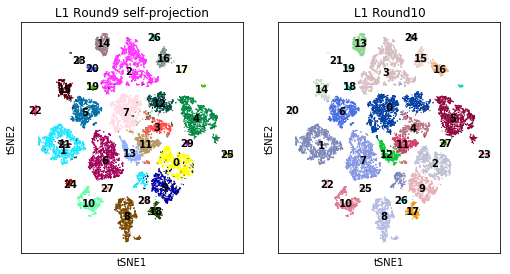

Round11 ...
Mean CV accuracy: 0.9759
Accuracy on the training set: 0.9905
Accuracy on the hold-out set: 0.9767


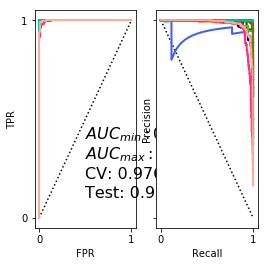

Accuracy on the training set: 0.9925
Accuracy on the hold-out set: 0.9748
Accuracy on the training set: 0.9900
Accuracy on the hold-out set: 0.9776
Max R1mat: 0.155556
Max R2mat: 0.004159
min_acc: 0.974773


<Figure size 288x288 with 0 Axes>

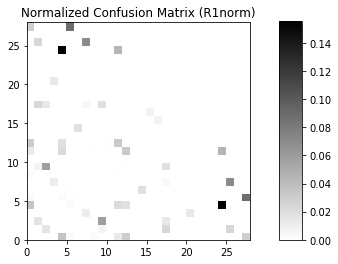

<Figure size 288x288 with 0 Axes>

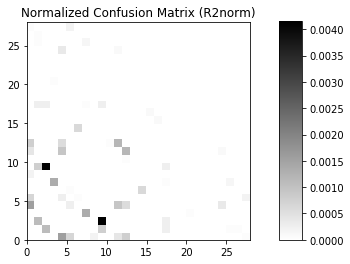

IGRAPH U-W- 28 4 --
+ attr: weight (e)
+ edges:
2--9 7--25 2--9 7--25


... storing 'L1_Round10_self-projection' as categorical
... storing 'L1_Round11' as categorical


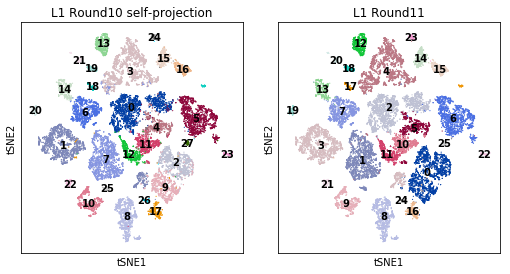

Round12 ...
Mean CV accuracy: 0.9824
Accuracy on the training set: 0.9934
Accuracy on the hold-out set: 0.9822


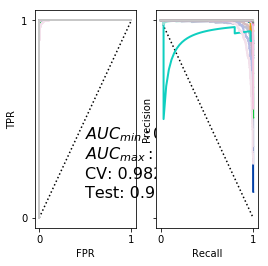

Accuracy on the training set: 0.9943
Accuracy on the hold-out set: 0.9788
Accuracy on the training set: 0.9938
Accuracy on the hold-out set: 0.9810
Max R1mat: 0.119048
Max R2mat: 0.001861
min_acc: 0.978781


<Figure size 288x288 with 0 Axes>

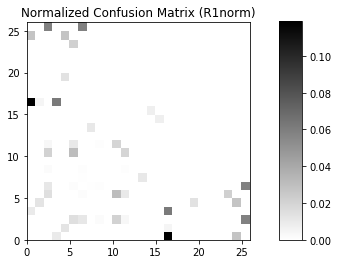

<Figure size 288x288 with 0 Axes>

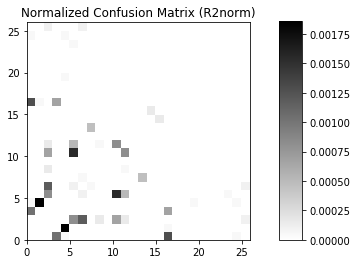

IGRAPH U-W- 26 2 --
+ attr: weight (e)
+ edges:
0--16 0--16


... storing 'L1_Round11_self-projection' as categorical
... storing 'L1_Round12' as categorical


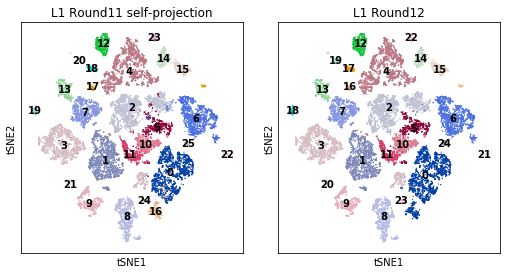

Round13 ...
Mean CV accuracy: 0.9756
Accuracy on the training set: 0.9899
Accuracy on the hold-out set: 0.9841


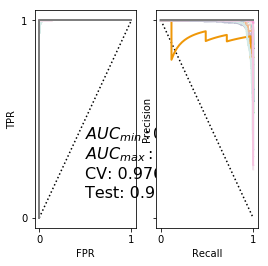

Accuracy on the training set: 0.9959
Accuracy on the hold-out set: 0.9828
Accuracy on the training set: 0.9926
Accuracy on the hold-out set: 0.9823
Max R1mat: 0.114286
Max R2mat: 0.002461
min_acc: 0.982340


<Figure size 288x288 with 0 Axes>

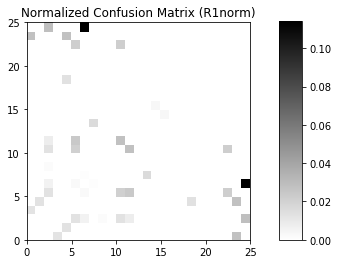

<Figure size 288x288 with 0 Axes>

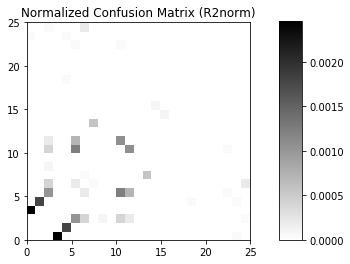

IGRAPH U-W- 25 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.114286
m2: 0.002461
Accuracy: 0.982340
start_iter: 12
R1norm_cutoff: 0.104286
R2norm_cutoff: 0.001461
Accuracy: 0.982340
Round13 ...
Mean CV accuracy: 0.9820
Accuracy on the training set: 0.9935
Accuracy on the hold-out set: 0.9820


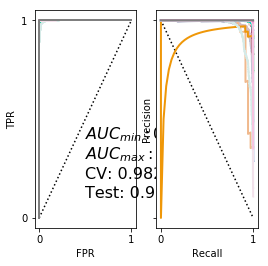

Accuracy on the training set: 0.9963
Accuracy on the hold-out set: 0.9812
Accuracy on the training set: 0.9949
Accuracy on the hold-out set: 0.9813
Max R1mat: 0.085714
Max R2mat: 0.002109
min_acc: 0.981223


<Figure size 288x288 with 0 Axes>

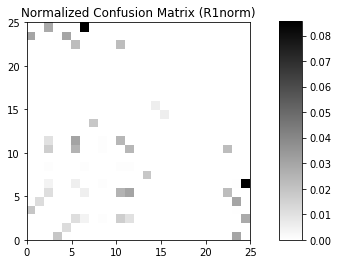

<Figure size 288x288 with 0 Axes>

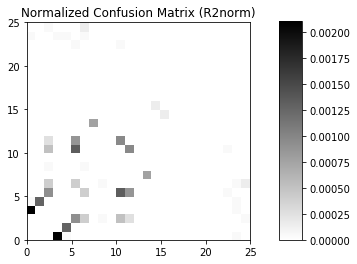

IGRAPH U-W- 25 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.085714
m2: 0.002109
Accuracy: 0.981223
start_iter: 12
R1norm_cutoff: 0.075714
R2norm_cutoff: 0.001109
Accuracy: 0.981223
Round13 ...
Mean CV accuracy: 0.9820
Accuracy on the training set: 0.9926
Accuracy on the hold-out set: 0.9823


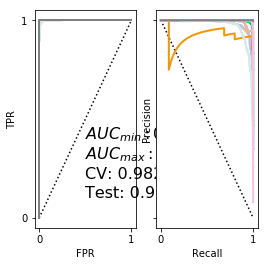

Accuracy on the training set: 0.9954
Accuracy on the hold-out set: 0.9832
Accuracy on the training set: 0.9917
Accuracy on the hold-out set: 0.9801
Max R1mat: 0.085714
Max R2mat: 0.002362
min_acc: 0.980107


<Figure size 288x288 with 0 Axes>

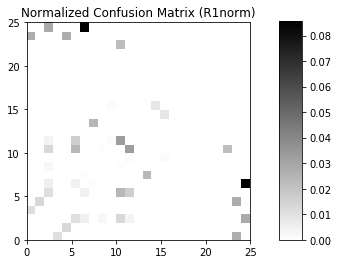

<Figure size 288x288 with 0 Axes>

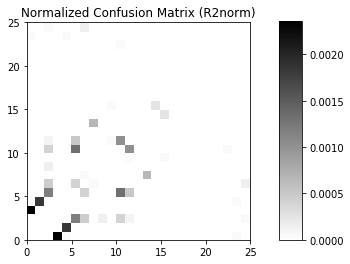

IGRAPH U-W- 25 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.085714
m2: 0.002362
Accuracy: 0.980107
start_iter: 12
R1norm_cutoff: 0.075714
R2norm_cutoff: 0.001362
Accuracy: 0.980107
Round13 ...
Mean CV accuracy: 0.9825
Accuracy on the training set: 0.9931
Accuracy on the hold-out set: 0.9816


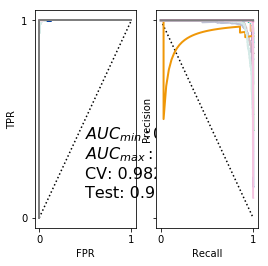

Accuracy on the training set: 0.9922
Accuracy on the hold-out set: 0.9795
Accuracy on the training set: 0.9959
Accuracy on the hold-out set: 0.9812
Max R1mat: 0.088235
Max R2mat: 0.001955
min_acc: 0.979548


<Figure size 288x288 with 0 Axes>

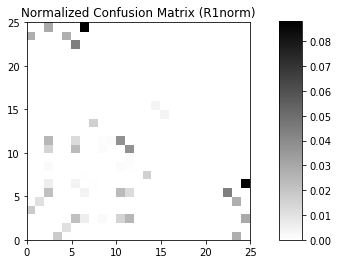

<Figure size 288x288 with 0 Axes>

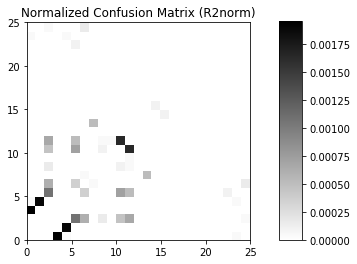

IGRAPH U-W- 25 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.088235
m2: 0.001955
Accuracy: 0.979548
CPU times: user 5min 18s, sys: 10min, total: 15min 19s
Wall time: 3min 18s


In [28]:
%%time
figsize(4,4)
SCCAF_optimize_all(min_acc=0.985, start='louvain_r1.5', low_res='louvain_r0.3', ad=ad, use='pca', basis='tsne')

... storing 'L1_Round12_self-projection' as categorical


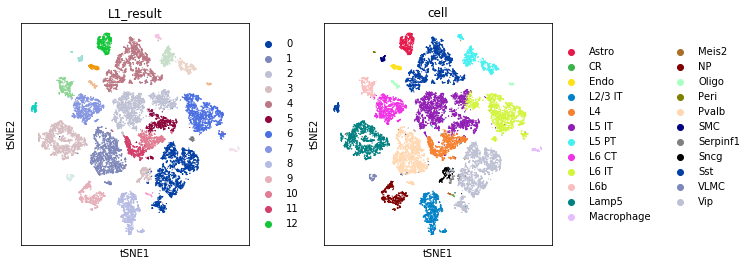

In [29]:
sc.pl.tsne(ad, color=['L1_result','cell'])

In [30]:
ad.write('../write/Tasic2018Cortex_reg.h5')

In [2]:
ad = sc.read('../write/Tasic2018Cortex_reg.h5')

In [31]:
ls ../reference/*Tasic2018Cortex*.csv

../reference/Tasic2016Cortex_Tasic2018Cortex_ACTINN.csv
../reference/Tasic2016Cortex_Tasic2018Cortex_CHETAH.csv
../reference/Tasic2016Cortex_Tasic2018Cortex_LogisticRegression.csv
../reference/Tasic2016Cortex_Tasic2018Cortex_moana.csv
../reference/Tasic2016Cortex_Tasic2018Cortex_scClassify.csv
../reference/Tasic2016Cortex_Tasic2018Cortex_singleCellNet.csv
../reference/Tasic2016Cortex_Tasic2018Cortex_SingleR.csv


In [102]:
from glob import iglob
ad1 = sc.read("../write/Tasic2018Cortex.h5")
for f in iglob("../reference/*Tasic2018Cortex*.csv"):
    id = f.split("_")[-1].replace('.csv','')
    print(id)
    if id in ['moana','ACTINN','LogisticRegression']:
        df = pd.read_csv(f,index_col=0,header=None)
        x = df[1]
    else:
        df = pd.read_csv(f,index_col=0)
        x = df['x']
    x = x.iloc[:ad1.shape[0]]
    ad1.obs[id] = x.tolist()
    ad.obs[id] = ad1[ad.obs_names,:].obs[id]

ACTINN
moana
singleCellNet
LogisticRegression
scClassify
CHETAH
SingleR


In [103]:
ii = []
for i in ad.obs['scClassify'].tolist():
    if i.find('_')>0:
        ii.append("mix")
    else:
        ii.append(i)
ad.obs['scClassify'] = ii

In [104]:
ad_ref = sc.read("../write/Tasic2016Cortex.h5")

ad_ref = ad_ref[~ad_ref.obs['cell'].isin(['Unclassified']),:]

ad1 = sc.read("../write/Tasic2018Cortex.h5")

def run_LR(ad, ad_ref):
    # ad_ref is the reference
    ad1 = ad_ref[:,ad_ref.var_names.isin(ad.var_names)]
    
    y_prob, y_pred, y_test, clf, cvsm, accuracy_test = SCCAF_assessment(ad1.X, \
                    ad1.obs['cell'], n=100)
    return(clf.predict(ad[:,ad1.var_names].X))

%%time
x = run_LR(ad1, ad_ref)

ad1.obs['LogisticRegression'] = x
ad.obs['LogisticRegression'] = ad1[ad.obs_names,:].obs['LogisticRegression']

In [110]:
for f in iglob("../reference/*Tasic2018Cortex*.csv"):
    id = f.split("_")[-1].replace('.csv','')
    print(id)
    ad.obs[id] = ad.obs[id].str.split().str[0]

ACTINN
moana
singleCellNet
LogisticRegression
scClassify
CHETAH
SingleR


In [111]:
ad.uns['L1_result_colors'] = [color_long[22],color_long[16],color_long[5],color_long[10],color_long[20],default_26[15],\
                             color_long[8],color_long[7],color_long[3],color_long[13],default_26[16],color_long[4],\
                             color_long[0],color_long[9],color_long[6],default_26[19],color_long[14],color_long[2],\
                             default_26[6],color_long[17],color_long[21],color_long[11],default_26[20],color_long[12],\
                             default_26[13],]

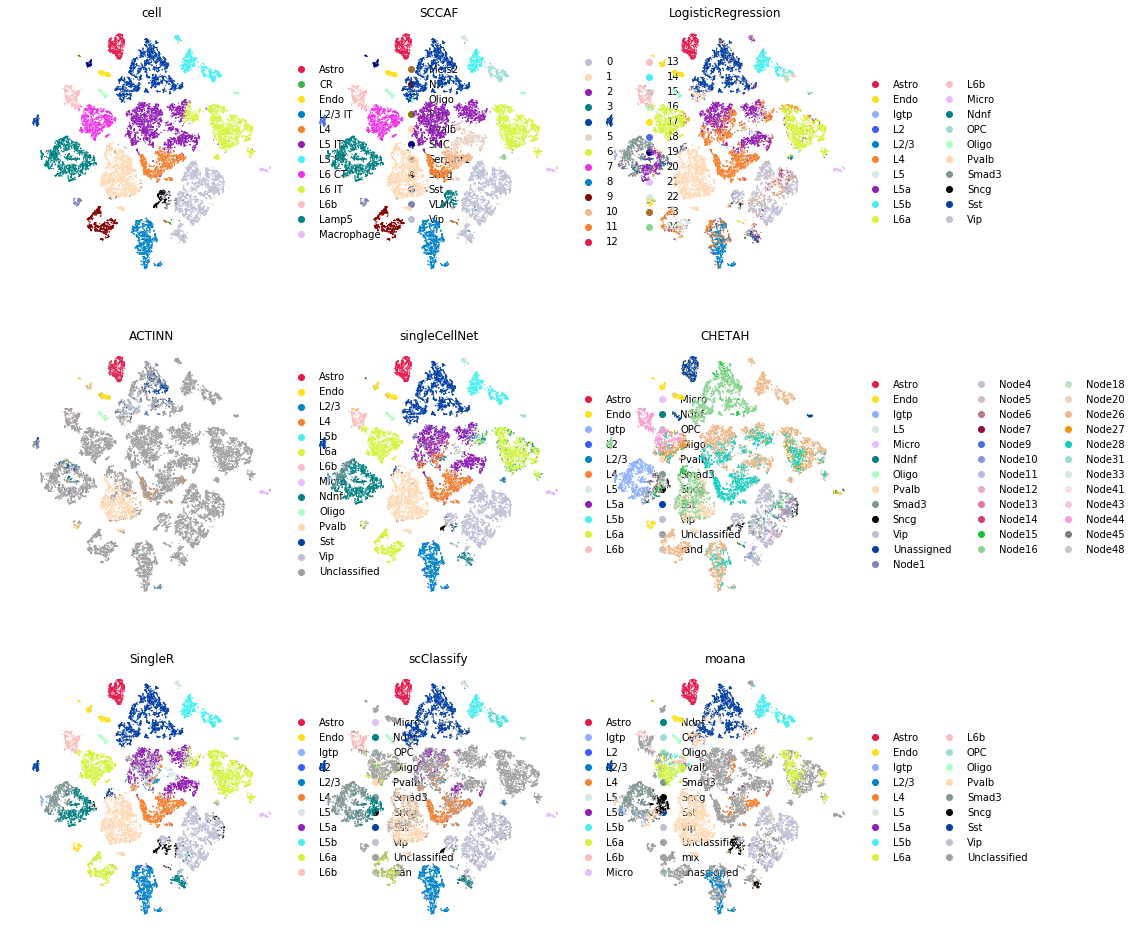

In [195]:
sc.pl.tsne(ad, color=['cell','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana'], ncols=3, frameon=False, wspace=0)

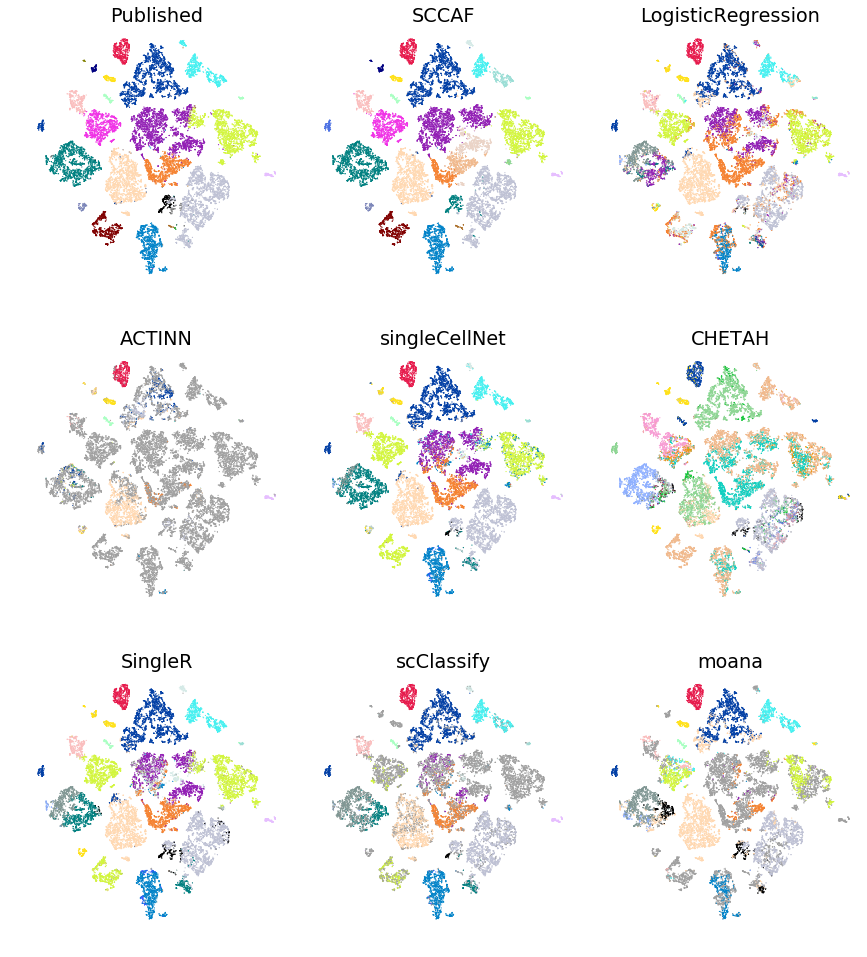

In [4]:
figsize(5,5)
matplotlib.rcParams.update({'font.size': 16})
sc.pl.tsne(ad, color=['cell','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana'], title= ['Published','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana'],ncols=3, frameon=False, wspace=0, legend_loc='', save='_Tasic2018.pdf')

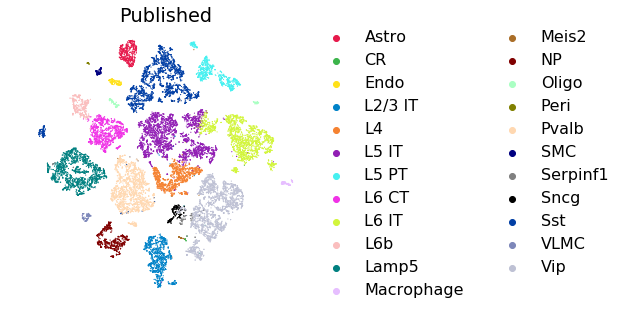

In [5]:
sc.pl.tsne(ad, color=['cell'], title='Published',frameon=False, save='_Tasic2018_colorbar1.pdf')

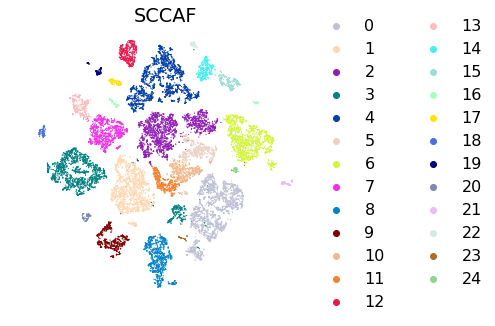

In [6]:
sc.pl.tsne(ad, color=['SCCAF'], frameon=False, save='_Tasic2018_colorbar2.pdf')

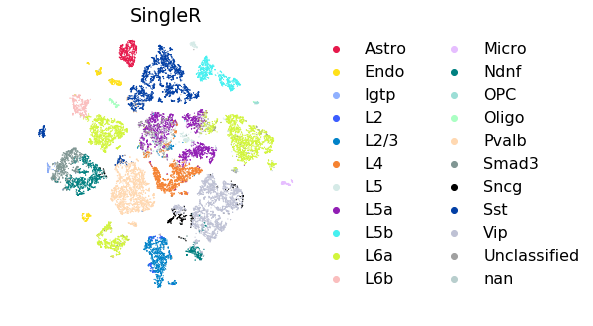

In [7]:
sc.pl.tsne(ad, color=['SingleR'], frameon=False, save='_Tasic2018_colorbar3.pdf')

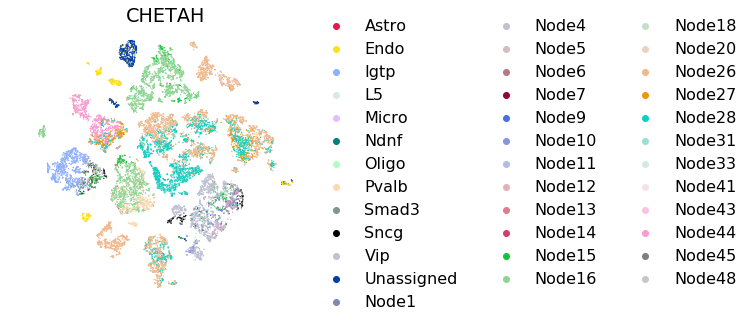

In [8]:
sc.pl.tsne(ad, color=['CHETAH'], frameon=False, save='_Tasic2018_colorbar4.pdf')

In [196]:
ad.write('../write/Tasic2018Cortex_reg.h5')

In [2]:
ad = sc.read('../write/Tasic2018Cortex_reg.h5')

In [143]:
ad.uns['singleCellNet_colors'] = [color_long[0],color_long[2],default_64[13],default_64[20],color_long[3],\
                                 color_long[4],default_26[20],color_long[5],color_long[6],color_long[8],\
                                 color_long[9],color_long[11],color_long[10],default_26[19],color_long[14],\
                                 color_long[16],default_64[16],color_long[19],color_long[20],color_long[22],\
                                 '#a0a0a0','#b8cecd']

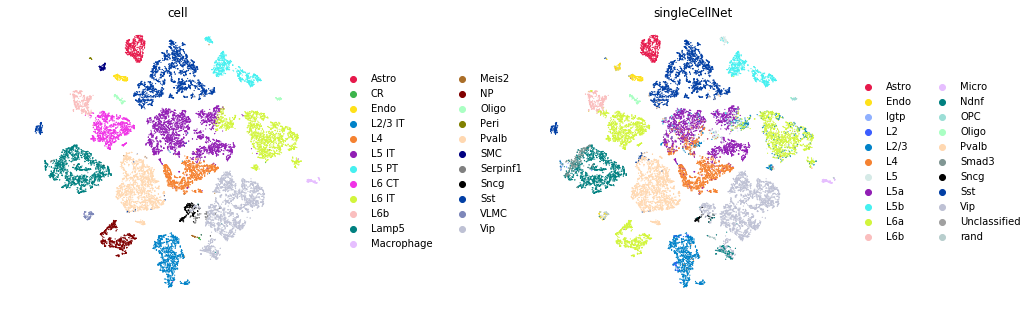

In [144]:
sc.pl.tsne(ad, color=['cell','singleCellNet'], frameon =False, wspace=0.5)

In [132]:
ad.obs['singleCellNet']= ad.obs['singleCellNet'].cat.reorder_categories(['Astro', 'Endo', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a',
       'L6b', 'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 'Sst',
        'Vip', 'Unclassified','rand'])

In [145]:
ad.uns['LogisticRegression_colors'] = ad.uns['singleCellNet_colors']

In [149]:
ad.obs['ACTINN']= ad.obs['ACTINN'].cat.reorder_categories(['Astro', 'Endo', 'L2/3', 'L4', 'L5b', 'L6a', 'L6b', 'Micro', 'Ndnf',
       'Oligo', 'Pvalb', 'Sst', 'Vip', 'Unclassified'])

In [152]:
ad.uns['ACTINN_colors'] = pd.Series(['Astro', 'Endo', 'L2/3', 'L4', 'L5b', 'L6a', 'L6b', 'Micro', 'Ndnf',
       'Oligo', 'Pvalb', 'Sst', 'Vip', 'Unclassified']).map(dict(zip(ad.obs['singleCellNet'].cat.categories,ad.uns['singleCellNet_colors'][:len(ad.obs['singleCellNet'].cat.categories)])))

In [155]:
ad.obs['CHETAH']= ad.obs['CHETAH'].cat.reorder_categories(['Astro', 'Endo', 'Igtp', 'L5', 'Micro', 'Ndnf', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 
       'Vip', 'Unassigned','Node1', 'Node4',
       'Node5', 'Node6', 'Node7', 'Node9', 'Node10', 'Node11', 'Node12',
       'Node13', 'Node14', 'Node15', 'Node16', 'Node18', 'Node20', 'Node26',
       'Node27', 'Node28', 'Node31', 'Node33', 'Node41', 'Node43', 'Node44',
       'Node45', 'Node48'])

In [160]:
ad.uns['CHETAH_colors'] = pd.Series(['Astro', 'Endo', 'Igtp', 'L5', 'Micro', 'Ndnf', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 
       'Vip']).map(dict(zip(ad.obs['singleCellNet'].cat.categories,ad.uns['singleCellNet_colors'][:len(ad.obs['singleCellNet'].cat.categories)]))).tolist()+default_26

In [184]:
ad.obs['SingleR']= ad.obs['SingleR'].cat.reorder_categories(['Astro', 'Endo', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a',
       'L6b', 'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 'Sst','Vip', 
       'Unclassified', 'nan'])

In [185]:
ad.uns['SingleR_colors'] = pd.Series(['Astro', 'Endo', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a',
       'L6b', 'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 'Sst','Vip', 
       'Unclassified']).map(dict(zip(ad.obs['singleCellNet'].cat.categories,ad.uns['singleCellNet_colors'][:len(ad.obs['singleCellNet'].cat.categories)]))).tolist()+['#b8cecd']

In [186]:
ad.obs['scClassify']= ad.obs['scClassify'].cat.reorder_categories(['Astro', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a', 'L6b',
       'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 'Sst',
       'Vip', 'Unclassified', 'mix', 'unassigned'])

In [187]:
ad.uns['scClassify_colors'] = pd.Series(['Astro', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a', 'L6b',
       'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 'Sst',
       'Vip', 'Unclassified']).map(dict(zip(ad.obs['singleCellNet'].cat.categories,ad.uns['singleCellNet_colors'][:len(ad.obs['singleCellNet'].cat.categories)]))).tolist()+['#a0a0a0','#b8cecd']

In [188]:
ad.obs['moana']= ad.obs['moana'].cat.reorder_categories(['Astro', 'Endo', 'Igtp', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a', 'L6b',
       'OPC', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 'Sst', 'Vip', 'Unclassified'])

In [189]:
ad.uns['moana_colors'] = pd.Series(['Astro', 'Endo', 'Igtp', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a', 'L6b',
       'OPC', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 'Sst', 'Vip', 'Unclassified']).map(dict(zip(ad.obs['singleCellNet'].cat.categories,ad.uns['singleCellNet_colors'][:len(ad.obs['singleCellNet'].cat.categories)]))).tolist()

In [193]:
ad.obs['SCCAF'] = ad.obs['L1_result']

In [194]:
ad.uns['SCCAF_colors'] = ad.uns['L1_result_colors']

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score

vals = []
svals = []
for id in ['cell','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana']:
    vals.append(adjusted_rand_score(ad.obs['cell'],ad.obs[id]))
    svals.append(adjusted_rand_score(ad.obs['SCCAF'],ad.obs[id]))

df = pd.DataFrame({'Published':vals,'SCCAF':svals})

df.index = ['Published','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana']

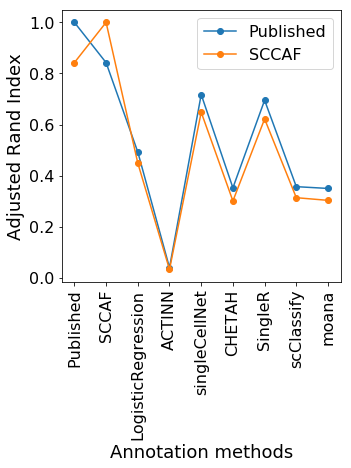

In [10]:
plt.plot(np.arange(df.shape[0]),df['Published'],'o-',c=default_20[0], label='Published')
plt.plot(np.arange(df.shape[0]),df['SCCAF'],'o-',c=default_20[1],label='SCCAF')
plt.xticks(np.arange(df.shape[0]), df.index, rotation=90)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlabel('Annotation methods', size=18)
plt.ylabel("Adjusted Rand Index", size=18)
plt.legend()
plt.savefig("ARI_Tasic2018.pdf")

# End